<a href="https://www.kaggle.com/code/kuralamuthan300/bankruptcy-prediction-twse?scriptVersionId=161864154" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Company Bankruptcy

Company bankruptcy occurs when a company cannot pay its debts and obligations to creditors, resulting in the company's assets being liquidated to repay those debts. This can lead to the company ceasing operations and potentially going out of business.

<center><img src="https://s3.amazonaws.com/journalism.industrydive.com/special-projects/retail/2021-bankruptcy-tracker/header.png" width="600" height="600"/></center>

# Why Study Past Bankruptcies ? 

* **Risk Awareness**: Studying bankrupt companies enhances risk awareness, allowing investors to identify and mitigate potential financial pitfalls in their investment portfolios.

* **Industry Insight**: Analysis of bankruptcies provides valuable industry insights, helping businesses and analysts understand market trends, challenges, and dynamics.

* **Learning Opportunitie**s: Examining failed companies offers learning opportunities, enabling individuals and organizations to derive lessons, improve decision-making, and avoid repeating past mistakes.

* **Regulatory Guidance**: Insights from bankruptcies contribute to the development of effective regulations, guiding policymakers in creating frameworks that prevent systemic issues and protect stakeholders.

* **Strategic Guidance**: For struggling companies, studying bankruptcies provides strategic guidance, offering proven turnaround strategies to navigate financial challenges and work towards successful recovery.

***

<center> <code style="background:red;color:white"> Before delving into data analysis and ML model creation, a data scientist must grasp the organizational context and the landscape of the data under study </code> </center>


# About dataset

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange (TWSE).

Data collected includes company's bankrupted due to the effects of Dotcom Bubble (late 1990s and early 2000s) and Global Financial crisis (2007 - 2008).

**DotCom Bubble :**

In Taiwan, technology stocks were at the forefront of Dotcom bubble. Companies related to semiconductors, software, and internet services saw their valuations skyrocket. However, the bubble eventually burst, leading to a sharp decline in stock prices. Many investors suffered substantial losses as the market corrected itself.

**Global Financial crisis :**

Taiwan recovered quickly from the global financial crisis of 2007–2010, and its economy has been growing steadily since. Its economy faced a downturn in 2009 due to a heavy reliance on exports which in turn made it vulnerable to world markets. Unemployment reached levels not seen since 2003, and the economy fell 8.36% in the fourth quarter of 2008.

Dataset URL : https://archive.ics.uci.edu/dataset/572/taiwanese+bankruptcy+prediction
Sourcr URL : https://en.wikipedia.org/wiki/Economy_of_Taiwan#2007%E2%80%932010_global_financial_crisis

## About source

Founded in April 1990, Taiwan Economic Journal (TEJ) specializes in providing all required and value-added information for fundamental analysis of the securities financial market. TEJ's primary business are selling domestic and international data on securities, finance, industries, and macroeconomics. Additionally, they provide consulting services in economic analysis, model design, and database construction.
   
<center><img src="https://i.ytimg.com/vi/LWDTMzdRHao/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLCL2BZOFidWb1-n2tZYji3DgnNOfA" width="600" height="600"/></center>

Source URL : https://www.tejwin.com/en/

***

## About Taiwan 

* The economy of Taiwan is a **highly developed free-market economy**. 

* **8th largest in Asia and 20th-largest in the world** by purchasing power parity, allowing Taiwan to be included in the advanced economies group by the International Monetary Fund. 

* Taiwan is notable for its rapid economic development from an **agriculture-based society to an industrialised**, high-income country. 

* Taiwan is one of the most technologically advanced computer microchip and high-tech electronics industries makers in the world.

* Taiwan is home to many companies responsible for notable contributions, such as TSMC, Foxconn, ASUS, PEGATRON, etc.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fb/GDP_per_capita_development_in_Taiwan.svg/1280px-GDP_per_capita_development_in_Taiwan.svg.png" width="600" height="600"/></center>

# Lets dive into the data 📖

In [19]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sklearn functions
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier

# Set seed
seed = np.random.seed(22)

In [3]:
company_df = pd.read_csv("/kaggle/input/company-bankruptcy-prediction/data.csv")
company_df = company_df.rename(columns=lambda x: x.strip())

In [4]:
company_df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
# Renaming Bankrupt column
company_df.rename(columns={'Bankrupt?': 'Bankrupt'},inplace = True)

In [6]:
# Dimension
print("\nData dimension :")
print("Number of Records : ",company_df.shape[0],"\nNumber of Features : ",company_df.shape[1])

# Datatype of columns
print("\nDatatype of Features :")
print(company_df.dtypes.value_counts())

# Missing values
print("\nMissing values :")
na_value_check = company_df.isna().sum()
if len(na_value_check[na_value_check > 0]) == 0 :
    print("Missing values not identified")
else :
    print(na_value_check[na_value_check > 0])

# Duplicated records check
print("\nDuplicated records :")
duplicate_rows = company_df.duplicated()
if len(company_df[duplicate_rows]) == 0:
    print("Duplicated records not identified")
else :
    print("Number of duplicated records :",len(company_df[duplicate_rows]))


Data dimension :
Number of Records :  6819 
Number of Features :  96

Datatype of Features :
float64    93
int64       3
dtype: int64

Missing values :
Missing values not identified

Duplicated records :
Duplicated records not identified


**Observations :**

* All the given features are numeric *(int64 or float64)*
* Column *Net Income Flag* and *Liability-Assets Flag* looks like a catogorical columns (These features have "Flag" in its name)
    * Bankrupt column is also an integer column
* There is no missing values

## Correlation study 🎢

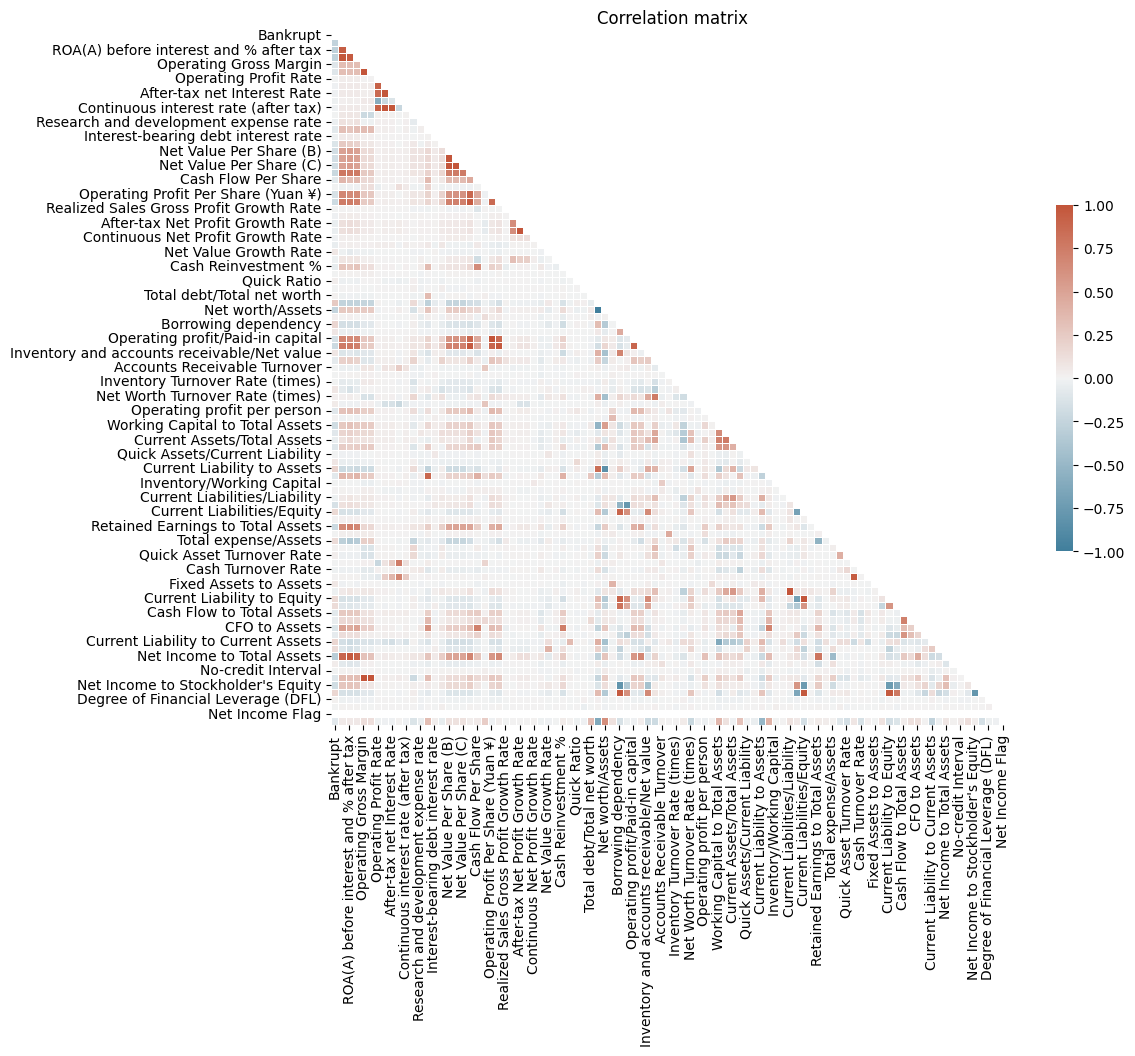

In [7]:
# Correlation

# Compute the correlation matrix
corr = company_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation matrix")
plt.show()

**Observations :** So many features in the data are very strongly correlated as they were derived from linear formulas. For example : ROA (A) and operating gross margin

## Curse of dimensionality

<div> <center>
    <img src="https://images.techhive.com/images/article/2015/01/social_network_analysis_visualization-100565998-orig.jpg?auto=webp&quality=85,70" width="500"/>
</center></div>

In the bankruptcy data we have has 90+ features. Analysing and building models using 90+ features is a time and resource consuming process.

*The curse of dimensionality is like trying to find a single sock in a mountain of laundry. As the number of dimensions (socks) increases, the chances of finding a match (meaningful patterns) become increasingly elusive and your search turns into a chaotic mess*

Lets narrow down our analysis to limited columns, so we will use decision tree algorithm.

**But why decision tree not other algorithms like Logistic regression or SVM or Random forest ??**

### Reasons to choose decision tree

* Can identify non linear relationships
* Relatively easier to built
* Good predictive power in a wide variety of use cases
* Low requirements for feature preprocessing
* Robust model which can handle outliers 

In [8]:
# Train and Test split
X = company_df.drop(['Bankrupt'],axis=1)
y = company_df.Bankrupt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Get top n features
## Lets select top 20 features based on feature importance
top_n_req = 20

In [30]:
# Define hyperparameters and their possible values for random search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Use RandomizedSearchCV for hyperparameter tuning with 5-fold cross-validation for decision tree classifier
random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_distributions=param_dist, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Pring best params
# random_search.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 5,
 'criterion': 'gini'}

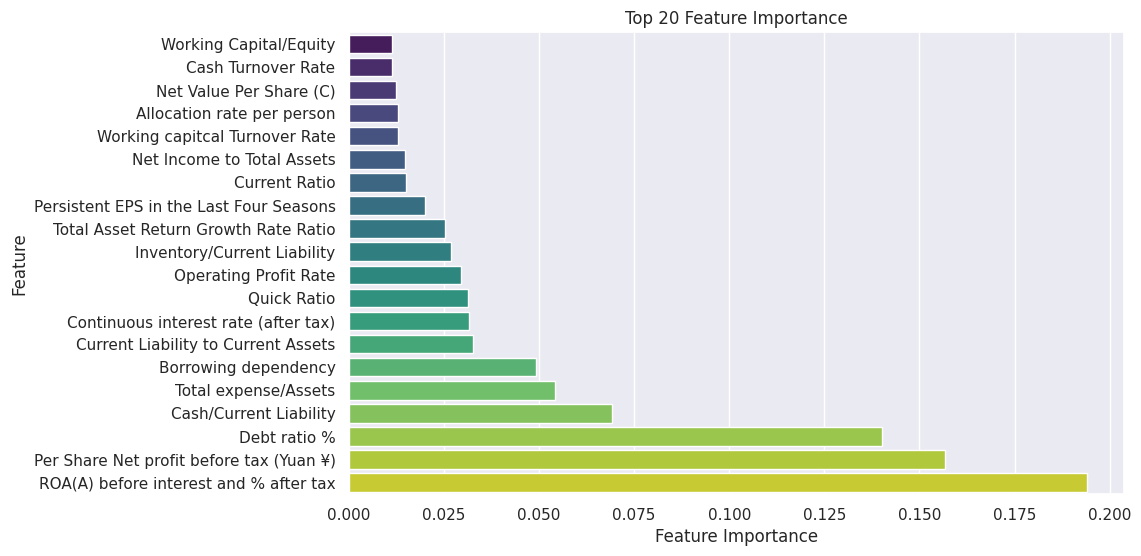

In [31]:
# Get best decision tree model
best_dt_classifier = random_search.best_estimator_

# Extract feature importances from the trained decision tree classifier
feature_importances = best_dt_classifier.feature_importances_
feature_names = best_dt_classifier.feature_names_in_

# Get the indices of the top 10 features
top_n_indices = np.argsort(feature_importances)[-top_n_req:]

# Create a DataFrame for easier plotting with seaborn
feature_importance_df = pd.DataFrame({'Feature': [feature_names[i] for i in top_n_indices],
                                      'Importance': feature_importances[top_n_indices]})

# Plot the top 10 features using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel("Feature Importance")
plt.title("Top "+str(top_n_req)+" Feature Importance")
plt.show()

In [36]:
# Selecting above features for EDA and model building
selected_features = feature_importance_df.Feature.to_list()

# Exploratory data analysis 🪄

Before creating plots and making conclusions on the data, lets understand the shortlisted features first.

* **Working Capital/Equity**: Measures the efficiency of capital utilization.
* **Cash Turnover Rate**: Indicates how quickly a company is able to generate cash.
* **Net Value Per Share (C)**: Net value attributed to each outstanding share.
* **Allocation rate per person**: Measures the allocation of resources per employee.
* **Working Capital Turnover Rate**: Evaluates efficiency in utilizing working capital.
* **Net Income to Total Assets**: Shows profitability relative to total assets.
* **Current Ratio**: Assesses a company's ability to cover short-term liabilities.
* **Persistent EPS in the Last Four Seasons**: Tracks earnings per share trends.
* **Total Asset Return Growth Rate Ratio**: Examines the growth rate of total asset returns.
* **Inventory/Current Liability**: Measures the liquidity of inventory relative to liabilities.
* **Operating Profit Rate**: Indicates the profitability of core business operations.
* **Quick Ratio**: Measures a company's ability to meet short-term obligations.
* **Continuous interest rate (after tax)**: Represents the after-tax interest rate.
* **Current Liability to Current Assets**: Assesses the relationship between current liabilities and assets.
* **Borrowing Dependency**: Examines the extent of reliance on borrowed funds.
* **Total Expense/Assets**: Measures the efficiency of asset utilization in generating income.
* **Cash/Current Liability**: Evaluates the liquidity of cash relative to current liabilities.
* **Debt Ratio %**: Expresses the proportion of debt to total assets as a percentage.
* **Per Share Net Profit Before Tax (Yuan ¥)**: Net profit attributed to each share before tax.
* **ROA(A) Before Interest and % After Tax**: Return on assets before interest and taxes after tax percentage.

## Target variable analysis

In [11]:
# Converting Bankrupt column to Categorical
company_df['Bankrupt'] = company_df['Bankrupt'].astype(str)

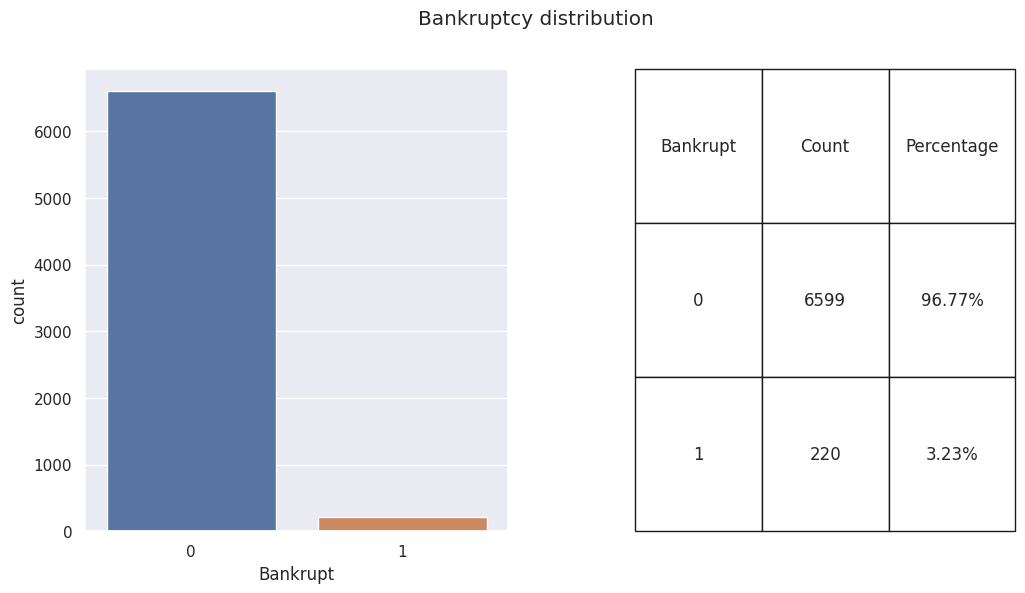

In [12]:
# Calculate counts and percentages
count_df = company_df['Bankrupt'].value_counts().reset_index()
count_df.columns = ['Bankrupt', 'Count']
count_df['Percentage'] = (count_df['Count'] / len(company_df)) * 100
count_df['Percentage'] = round(count_df['Percentage'],2)
count_df['Percentage'] = count_df['Percentage'].astype(str) + "%"

# Create a countplot
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

# Plot the countplot
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Bankrupt', data=company_df, order = ["0","1"])

# Create a table with counts and percentages
margins = 0.1
plt.subplot(1, 2, 2)
table_ax = plt.gca()
table_ax.axis('off')  # Turn off axis for the table
table_ax.table(cellText=count_df.values,
               colLabels=count_df.columns,
               cellLoc='center',
               loc='center',
              bbox=[margins, 0, 1 - 1 * margins, 1])

plt.suptitle('Bankruptcy distribution')
plt.show()

# Data imbalance problem ⚖️

In the above plot, we can notice that **Bankrupt companies contributes to 3.23% of the entire dataset**. In further train test split, we will end up with very minimal samples in "1" class in train set.

In real world usecases, its very normal to encounter a imbalanced dataset.But why data imbalance is such a such a huge problem ?

Imbalanced datasets pose challenges such as,
* Bias towards the majority class
* Poor generalization
* Inflated accuracy
* Difficulty in capturing rare events
* Insufficient learning from the minority class
* Biased feature importance

We can solve this problem by Oversampling/Undersampling the existing records using various algorithms such as **SMOTE, ADASYN, Tomek Links, Edited Nearest Neighbors, SMOTEENN, SMOTETomek** etc.,
<center><img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*P93SeDGPGw0MhwvCcvVcXA.png" width="1000" height="1000"/></center>

> **We will apply oversampling/undersampling techniques only on train samples to avoid any syntetic instances while evaluating the models**